# Versuch 234 Lichtquellen - Auswertung 

## Teil 1: Auswertung des Sonnenspektrums

In [1]:
#Benötigte Pakete
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

#Ersetzen der Kommata
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

In [2]:
#Messwerte Himmellicht ohne Fenster
lambda_og, intensity_og=np.loadtxt('Messdaten/himmel_ohne_fenster.txt', skiprows=17,
                                    converters= {0:comma_to_float, 1:comma_to_float},
                                    unpack=True)
#Messwerte Himmellicht mit Fenster
lambda_mg, intensity_mg=np.loadtxt('Messdaten/himmel_mit_fenster.txt', skiprows=17,
                                    converters= {0:comma_to_float, 1:comma_to_float},
                                    unpack=True)

### Vergleich der beiden aufgenommenen Spektren

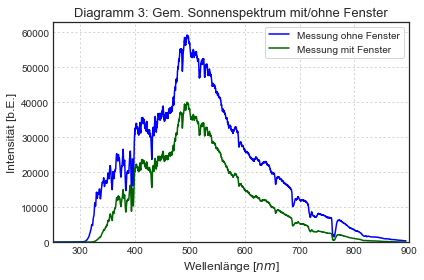

In [3]:
#Plotten der beiden Sprektren in ein gemeinsames Diagramm
plt.plot(lambda_og,intensity_og, label='Messung ohne Fenster', color='blue')
plt.plot(lambda_mg,intensity_mg, label='Messung mit Fenster', color='darkgreen')
plt.title('Diagramm 3: Gem. Sonnenspektrum mit/ohne Fenster', size=13)
plt.xlabel('Wellenlänge [$nm$]', size=12)
plt.ylabel('Intensität [b.E.]', size=12)
plt.legend(frameon=True)
plt.grid(ls='dotted')
plt.ylim(0,63000)
plt.xlim(250,900)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V234Diagramm3.pdf', format='PDF')

### Berechnung der Absorption 

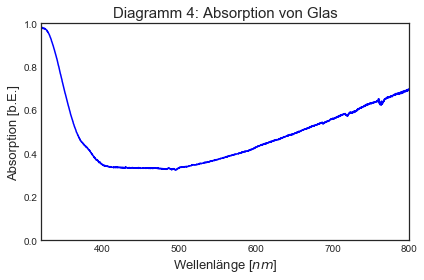

In [4]:
absorption=1-intensity_mg/intensity_og

#Plotten der Absorptionskurve
plt.plot(lambda_mg,absorption, color='blue')
plt.title('Diagramm 4: Absorption von Glas', size= 15) 
plt.xlabel('Wellenlänge [$nm$]', size= 13)
plt.ylabel('Absorption [b.E.]', size= 13)
plt.ylim((0,1))
plt.xlim((320,800))

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V234Diagramm4.pdf', format='PDF')

### Analyse der Fraunhoferlinien (am Bsp. des Himmelslichts,weil keine direkte Sonnenmessung möglich war)

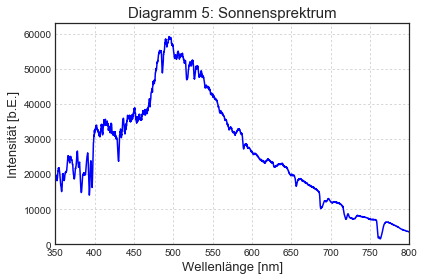

In [5]:
plt.plot(lambda_og,intensity_og, color='blue')
plt.title('Diagramm 5: Sonnensprektrum', size=15)
plt.xlabel('Wellenlänge [nm]', size=13)
plt.ylabel('Intensität [b.E.]', size=13)
plt.grid(ls='dotted')
plt.ylim(0,63000)
plt.xlim(350,800)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V234Diagramm5.pdf', format='PDF')

In [6]:
#Ausmessung der Fraunhoferlinien [nm]

balmer_series=np.array([656.3,486.2,434.1,410.2])
helium_yellow=589.4

telluric_oxygen=np.array([760.6,687.4])
hydrogen=np.array([656.3,486.2]) #enthalten in Balmer-Serie
sodium=np.array([589.7,589.5])
iron_and_calcium=np.array([527.1,430.6])
magnesium=518.0
calcium=np.array([396.8,393.3])

pos_err=1 #nm

#Literaturwerte [nm]
balmer_lit=np.array([656.3,486.1,434.0,410.1]) 
helium_lit=587.6 #nm

oxygen_lit=np.array([759.4,686.7]) 
sodium_lit=np.array([589.6,589.0]) 
iron_and_calcium_lit=np.array([527.0,430.8]) 
magnesium_lit=518.4
calcium_lit=np.array([396.8,393.4])


In [7]:
#Vergleich Messwert-Literatur 
diff_balmer= np.abs(balmer_lit-balmer_series)
diff_helium= np.abs(helium_lit-helium_yellow)

diff_oxygen=np.abs(oxygen_lit-telluric_oxygen)
diff_sodium= np.abs(sodium_lit-sodium)
diff_iron_calcium= np.abs(iron_and_calcium_lit-iron_and_calcium)
diff_magnesium= np.abs(magnesium_lit-magnesium)
diff_calcium= np.abs(calcium_lit-calcium)
#Fehler entspricht dem Messfehler pos_err=1 nm

print("Differenz der gemessenen Linien und der Literaturangabe:")
print()
print('Helium:'+ str(diff_balmer))
print('Sauerstoff:'+ str(diff_helium))
print('Sodium:'+ str(diff_oxygen))
print('Eisen und Calcium:'+ str(diff_iron_calcium))
print('Magnesium:'+ str(diff_magnesium))
print('Calcium:'+ str(diff_calcium))
print()
print('Der Messfehler betrug 1 nm.')

Differenz der gemessenen Linien und der Literaturangabe:

Helium:[ 0.   0.1  0.1  0.1]
Sauerstoff:1.8
Sodium:[ 1.2  0.7]
Eisen und Calcium:[ 0.1  0.2]
Magnesium:0.4
Calcium:[ 0.   0.1]

Der Messfehler betrug 1 nm.


## Teil 2: Auswertung des Natriumspektrums

In [8]:
#Spektrum mit hoher Intensität aufgenommen
lambda_nat_low, intensity_nat_low=np.loadtxt('Messdaten/Natrium_geringe_Intensitaet.txt', skiprows=17,
                                    converters= {0:comma_to_float, 1:comma_to_float},
                                    unpack=True)
#Spektrum mit mittlerer Intensität aufgenommen
lambda_nat_med, intensity_nat_med=np.loadtxt('Messdaten/Natrium_mittlere_Intensitaet.txt', skiprows=17,
                                    converters= {0:comma_to_float, 1:comma_to_float},
                                    unpack=True)
#Spektrum mit hoher Intensität aufgenommen
lambda_nat_high, intensity_nat_high=np.loadtxt('Messdaten/Natrium_hohe_Intensitaet.txt', skiprows=17,
                                    converters= {0:comma_to_float, 1:comma_to_float},
                                    unpack=True)

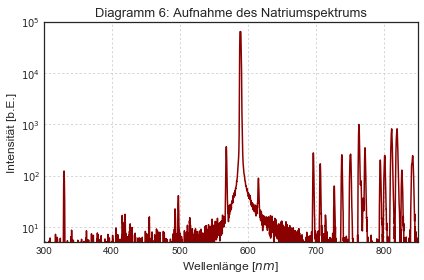

In [9]:
#Plot niedrige Intensität
plt.plot(lambda_nat_low,intensity_nat_low,color='darkred')
plt.title('Diagramm 6: Aufnahme des Natriumspektrums', size=13)
plt.xlabel('Wellenlänge [$nm$]', size=12)
plt.ylabel('Intensität [b.E.]', size=12)
plt.yscale('log')
plt.grid(ls='dotted')
plt.ylim(5,1e5)
plt.xlim(300,850)

#Einzeichen der berechneten Theorie-Werte, muss zuerst weiter unten ausgeführt werden
#for a in neben1_theory:
#    plt.plot((a,a),(0,100000),'g',linewidth=0.5)
#for b in neben2_theory:
#    plt.plot((b,b),(0,100000),'b',linewidth=0.5)
#for c in main_theory:
#    plt.plot((c,c),(0,100000),'orange',linewidth=0.5)



#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V234Diagramm6.pdf', format='PDF')

In [10]:
#Ausmessung der Wellenlängen (erst einmal die drei im Bereich 560-620nm) 

#Reihenfolge der Einträge im Array ist die Messfolge von links nach rechts
lambda_center=np.array([568.6,589.4,616.0])
#Fehler aus der Halbwertsbreite,ebenfalls vermessen mit dem Cursor
lambda_center_err=np.array([1.3,2.3,1.7])


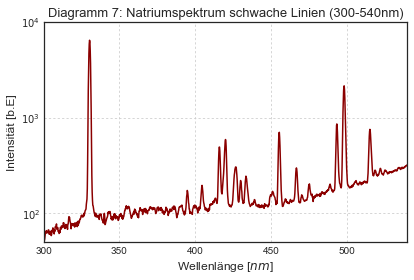

In [11]:
#Plot hohe Intensität in 300-540nm
plt.plot(lambda_nat_high,intensity_nat_high,color='darkred')
plt.title('Diagramm 7: Natriumspektrum schwache Linien (300-540nm)', size=13)
plt.xlabel('Wellenlänge [$nm$]', size=12)
plt.ylabel('Intensität [b.E]', size=12)
plt.yscale('log')
plt.grid(ls='dotted')
plt.ylim(50,1e4)
plt.xlim(300,540)

#untere Zellen müssen hierfür zuerst ausgeführt werden, da die Theorie-Werte erst im nächsten Abschnitt berechnet wurden.
#for a in neben1_theory:
#    plt.plot((a,a),(50,10000),'g',linewidth=0.5)
#for b in neben2_theory:
#    plt.plot((b,b),(50,10000),'b',linewidth=0.5)
#for c in main_theory:
#    plt.plot((c,c),(50,10000),'orange',linewidth=0.5)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V234Diagramm7.pdf', format='PDF')

In [12]:
#Ausmessung der Wellenlängen (im Bereich 300-540nm) 

#Reihenfolge der Einträge im Array ist die Messfolge von links nach rechts
lambda_left=np.array([330.3,394.8,404.5,416.0,420.0,426.8,430.1,433.6,450.9,455.5,466.8,475.4,493.4,498.2,515.3])
#Fehler aus der Halbwertsbreite,ebenfalls vermessen mit dem Cursor
lambda_left_err=np.array([1.5,2.7,2.6,1.7,1.9,3.2,2.1,2.1,4.4,1.5,2.4,3.9,1.6,1.5,2.1])

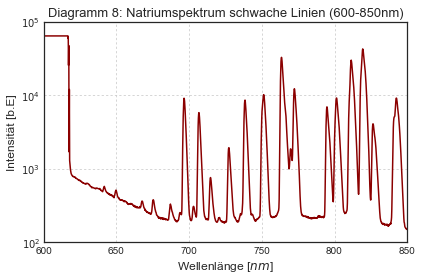

In [13]:
#Plot hohe Intensität in 600-850nm
plt.plot(lambda_nat_high,intensity_nat_high,color='darkred')
plt.title('Diagramm 8: Natriumspektrum schwache Linien (600-850nm)', size=13)
plt.xlabel('Wellenlänge [$nm$]', size=12)
plt.ylabel('Intensität [b.E]', size=12)
plt.yscale('log')
plt.grid(ls='dotted')
plt.ylim(1e2,1e5)
plt.xlim(600,850)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V234Diagramm8.pdf', format='PDF')

In [14]:
#Ausmessung der Wellenlängen (im Bereich 600-850nm) 

#Reihenfolge der Einträge im Array ist die Messfolge von links nach rechts
lambda_left=np.array([696.5,706.7,714.6,727.3,738.3,751.2,763.5,772.3,794.7,801.3,811.3,819.4,826.4,842.5])
#Fehler aus der Halbwertsbreite,ebenfalls vermessen mit dem Cursor
lambda_left_err=np.array([1.4,1.8,2.3,2.2,1.6,2.6,1.8,1.8,2.2,2.4,2.3,2.8,2.5,3.4])

## Teil 3: Zuordnung der Linien zu den Serien 

### 3.1 erste Nebenserie md -> 3p

In [15]:
#Berechne E3p aus bestimmer Linie um 819nm mit m=3
E_ryd=-13.605 #eV
hc=1.2398e3 #nm*eV
E3p=E_ryd/9-hc/819.4
E3p_err=hc*2.8/819.4**2

liste1=[]
for m in range(3,13):
    l=hc/(E_ryd/m**2-E3p)
    l_err=hc*E3p_err/(E_ryd/m**2-E3p)**2
    liste1.append(l)
    print('m={m:2d},  lambda={l:6.2f},  error={l_err:6.2f}'.format(m=m,l=l,l_err=l_err))
    
neben1_theory=np.array(liste1)    


m= 3,  lambda=819.40,  error=  2.80
m= 4,  lambda=570.18,  error=  1.36
m= 5,  lambda=499.81,  error=  1.04
m= 6,  lambda=468.41,  error=  0.92
m= 7,  lambda=451.32,  error=  0.85
m= 8,  lambda=440.87,  error=  0.81
m= 9,  lambda=433.99,  error=  0.79
m=10,  lambda=429.19,  error=  0.77
m=11,  lambda=425.71,  error=  0.76
m=12,  lambda=423.10,  error=  0.75


### 3.2 zweite Nebenserie ms -> 3p

In [16]:
D_line=589.0 #nm
E3s=E3p-hc/D_line
E3s_err=E3p_err  #alle anderen Größen fehlerfrei 

#Korrekturfaktor
delta_s=3-np.sqrt(E_ryd/E3s)
delta_s_err=np.sqrt(E_ryd/E3s)/(2*np.abs(E3s))*E3s_err

liste2=[]
for n in range(4,10):
    l2=hc/(E_ryd/(n-delta_s)**2-E3p)
    l2_err=np.sqrt(((hc*E3p_err)/(E_ryd/(n-delta_s)**2-E3p)**2)**2+((2*hc*(n-delta_s)*delta_s_err)/(E_ryd-E3p*(n-delta_s)**2)**2)**2)
    liste2.append(l2)
    print('n={n:2d},  lambda={l2:6.2f},  error={l2_err:6.2f}'.format(n=n,l2=l2,l2_err=l2_err))
 
neben2_theory=np.array(liste2)  

n= 4,  lambda=1174.43,  error=  5.75
n= 5,  lambda=622.57,  error=  1.62
n= 6,  lambda=518.81,  error=  1.12
n= 7,  lambda=477.71,  error=  0.95
n= 8,  lambda=456.63,  error=  0.87
n= 9,  lambda=444.22,  error=  0.82


### 3.2 Hauptserie mp -> 3s

In [17]:
#Korrekturfaktor
delta_p=3-np.sqrt(E_ryd/E3p)
delta_p_err=np.sqrt(E_ryd/E3p)/(2*np.abs(E3p))*E3p_err

liste3=[]
for i in range(4,6):
    l3=hc/(E_ryd/(i-delta_p)**2-E3s)
    l3_err=np.sqrt(((hc*E3s_err)/(E_ryd/(i-delta_p)**2-E3s)**2)**2+((2*hc*(i-delta_p)*delta_p_err)/(E_ryd-E3s*(i-delta_p)**2)**2)**2)
    liste3.append(l3)
    print('i={i:2d},  lambda={l3:6.2f},  error={l3_err:6.2f}'.format(i=i,l3=l3,l3_err=l3_err))
    
main_theory=np.array(liste3)   

i= 4,  lambda=332.14,  error=  0.46
i= 5,  lambda=286.43,  error=  0.34


## Teil 4: Bestimmung der Serienenergien und der l-abhängigen Korrekturfaktoren

In [18]:
#Zuordnung der Messwerte zur ersten Nebenserie anhand der Theorie-Werte
neben1=np.array([819.4,568.6,498.2,466.8,450.9,433.6]) 
neben1_err=np.array([2.8,1.3,1.5,2.4,4.4,2.1])
quantenzahlen_1=np.array([3,4,5,6,7,9])


In [19]:
#Bestimmung der gesuchten Parameter durch Fit der entsprechenden Funktion
from scipy.optimize import curve_fit

def fit_func1(m,E_ryd1,E3p1,delta_d):
    return hc/(E_ryd1/(m-delta_d)**2-E3p1)

para1 = [-13.6,-3,-0.02]
popt1,pcov1 = curve_fit(fit_func1, quantenzahlen_1, neben1, sigma=neben1_err, p0=para1)

print('Die Fitparameter wurden wie folgt bestimmt:')
print()
print("E_ryd1=",popt1[0]," +/- ", np.sqrt(pcov1[0,0]))
print("E3p1=",popt1[1]," +/- ", np.sqrt(pcov1[1,1]))
print("delta_d=",popt1[2]," +/- ", np.sqrt(pcov1[2,2]))

#Bestimmung der chi^2 Summe
chi2_1=np.sum((fit_func1(quantenzahlen_1,*popt1)-neben1)**2/neben1_err**2)
dof1=len(quantenzahlen_1)-3 #Freiheitsgrade
chi2_red_1=chi2_1/dof1
print("chi2_1=", chi2_1)
print("chi2_red_1", chi2_red_1)

#Fitwahrscheinlichkeit
from scipy.stats import chi2
prob1=round(1-chi2.cdf(chi2_1,dof1),2)*100
print("Wahrscheinlichkeit:", prob1, "%")

Die Fitparameter wurden wie folgt bestimmt:

E_ryd1= -13.2432491247  +/-  0.155011964249
E3p1= -3.02626994445  +/-  0.00333788296537
delta_d= 0.0417824488842  +/-  0.0145295289636
chi2_1= 0.10332155473
chi2_red_1 0.0344405182433
Wahrscheinlichkeit: 99.0 %


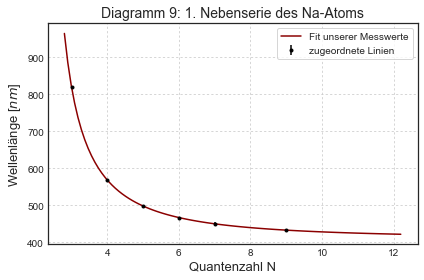

In [20]:
#Plot der Messwerte und der berechneten Fit-Funktion
plt.errorbar(quantenzahlen_1,neben1,yerr=neben1_err,fmt=".", color='black',label='zugeordnete Linien')
plt.xlabel('Quantenzahl N', size=13)
plt.ylabel('Wellenlänge [$nm$]', size=13)
plt.title('Diagramm 9: 1. Nebenserie des Na-Atoms', size=14)
x1=np.linspace(2.8,12.2,100)
plt.plot(x1,fit_func1(x1,*popt1), color='darkred',label='Fit unserer Messwerte')
plt.grid(ls='dotted')
plt.legend(frameon=True)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V234Diagramm9.pdf', format='PDF')

In [21]:
#Analoges Verfahren für die zweite Nebenserie
neben2=np.array([518.8,455.5]) 
neben2_err=np.array([2.2,1.5])
quantenzahlen_2=np.array([6,8])

In [22]:
def fit_func2(m,E_ryd2,E3p2,delta_s):
    return hc/(E_ryd2/(m-delta_s)**2-E3p2)

#Da zu wenig passende Linien gefunden wurden,wird die Kurve aus den Theorie-Werten berechnet.
#Die beiden Werte passenden gefundenen Werte werden dann auf der Theorie-Kurve markiert.

para2 = [-13.6,-3,1]
popt2,pcov2 = curve_fit(fit_func2, np.arange(4,10), neben2_theory,sigma=1.7*np.ones(6), p0=para2)



print('Die Fitparameter wurden wie folgt bestimmt:')
print()
print("E_ryd2=",popt2[0]," +/- ", np.sqrt(pcov2[0,0]))
print("E3p2=",popt2[1]," +/- ", np.sqrt(pcov2[1,1]))
print("delta_s=",popt2[2]," +/- ", np.sqrt(pcov2[2,2]))

#Bestimmung der chi^2 Summe
chi2_2=np.sum((fit_func2(np.arange(4,10),*popt2)-neben2_theory)**2/(1.7*np.ones(6))**2)
dof2=len(np.arange(4,10))-3 #Freiheitsgrade
chi2_red_2=chi2_2/dof2
print("chi2_2=", chi2_2)
print("chi2_red_2", chi2_red_2)

#Fitwahrscheinlichkeit
prob2=round(1-chi2.cdf(chi2_2,dof2),2)*100
print("Wahrscheinlichkeit:", prob2, "%")

Die Fitparameter wurden wie folgt bestimmt:

E_ryd2= -13.605  +/-  3.45208920817e-13
E3p2= -3.02472500203  +/-  8.11361283811e-15
delta_s= 1.3714336188  +/-  2.83855526914e-14
chi2_2= 1.17060188871e-24
chi2_red_2 3.9020062957e-25
Wahrscheinlichkeit: 100.0 %


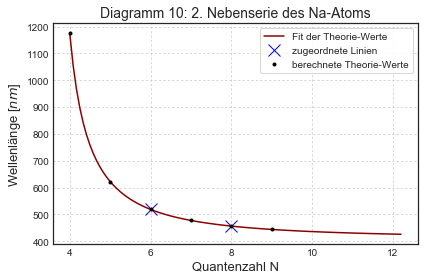

In [23]:
#Plot der Messwerte und der berechneten Fit-Funktion
%matplotlib inline
plt.errorbar(np.arange(4,10),neben2_theory,fmt=".", color='black',label='berechnete Theorie-Werte')
plt.xlabel('Quantenzahl N', size=13)
plt.ylabel('Wellenlänge [$nm$]', size=13)
plt.title('Diagramm 10: 2. Nebenserie des Na-Atoms', size=14)
x2=np.linspace(4,12.2,100)
plt.plot(x2,fit_func2(x2,*popt2), color='darkred',label='Fit der Theorie-Werte')
plt.plot(quantenzahlen_2,neben2,color='blue',marker='x',markersize=12,linewidth=0,label='zugeordnete Linien ')
plt.grid(ls='dotted')
plt.legend(frameon=True)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V234Diagramm10.pdf', format='PDF')

